In [14]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from pmdarima import auto_arima



In [15]:
# !pip install pmdarima

In [6]:
# Define the ticker symbol
ticker_symbol = 'AMD'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Get the historical prices for this ticker
ticker_df = ticker_data.history(period='1y')

# Print the latest closing price
if not ticker_df.empty:
    latest_close = ticker_df['Close'].iloc[-1]
    print(f"Latest closing price for {ticker_symbol}: ${latest_close:.2f}")
else:
    print(f"No data available for {ticker_symbol} for the specified date.")

Latest closing price for AMD: $179.04


In [7]:
ticker_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-24 00:00:00-05:00,73.750000,75.639999,73.419998,74.699997,60822600,0.0,0.0
2023-01-25 00:00:00-05:00,72.900002,75.120003,72.089996,74.910004,49932600,0.0,0.0
2023-01-26 00:00:00-05:00,76.500000,77.080002,74.279999,75.160004,49583900,0.0,0.0
2023-01-27 00:00:00-05:00,73.699997,76.739998,73.489998,75.400002,58118600,0.0,0.0
2023-01-30 00:00:00-05:00,74.230003,74.639999,72.400002,72.449997,48105200,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-18 00:00:00-05:00,166.199997,168.600006,158.220001,162.669998,131864900,0.0,0.0
2024-01-19 00:00:00-05:00,165.800003,174.250000,162.199997,174.229996,139825500,0.0,0.0
2024-01-22 00:00:00-05:00,174.389999,174.720001,164.149994,168.179993,122973800,0.0,0.0


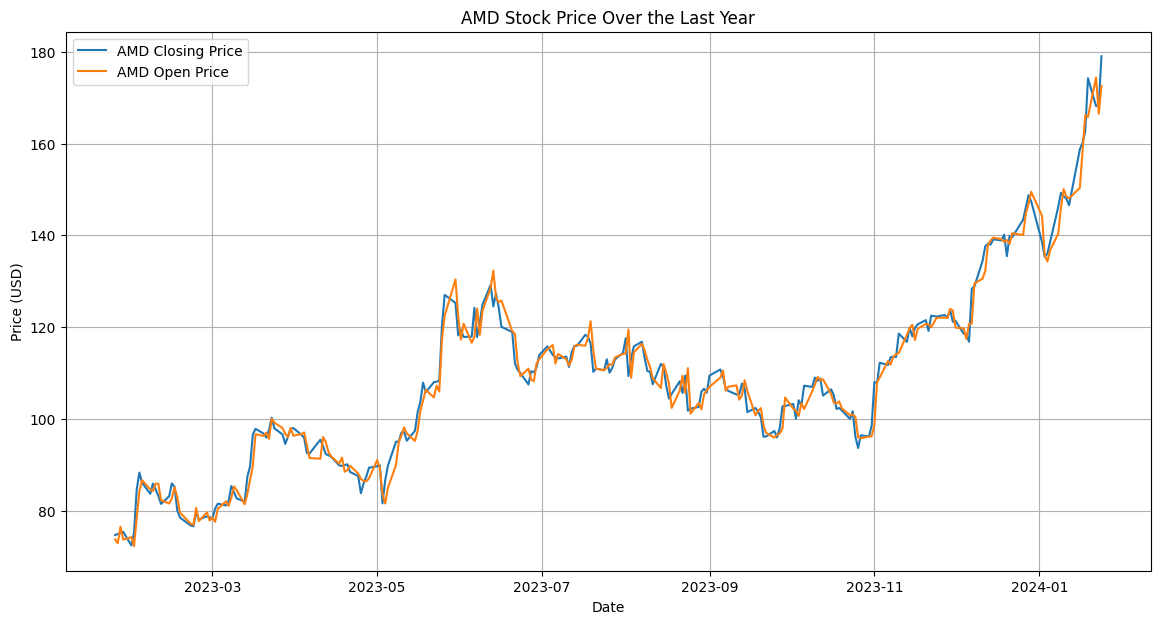

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(ticker_df['Close'], label='AMD Closing Price')
plt.plot(ticker_df['Open'], label='AMD Open Price')

plt.title('AMD Stock Price Over the Last Year')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
# Select only the closing prices
closing_prices = ticker_df['Close']

# Splitting the data into train and test
train = closing_prices.iloc[:-5]
test = closing_prices.iloc[-5:]

# Building the model
model = auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True,
                   error_action="ignore", max_order=None, trace=True)


# Forecasting the next 5 days
forecast = model.predict(n_periods=5)


forecast_dates = pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=5)
forecast_df = pd.DataFrame(data=forecast.values, index=forecast_dates).rename(columns={0:'pred_price'}).reset_index(names='Date')
actual_df = pd.DataFrame(test)

combined_df = pd.merge(forecast_df, actual_df, on='Date')
combined_df

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1265.650, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1267.567, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1267.571, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1266.637, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1269.559, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.398 seconds


c:\Users\Ivy\IvyProjects\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ivy\IvyProjects\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,Date,pred_price,Close
0,2024-01-18 00:00:00-05:00,160.517437,162.669998
1,2024-01-19 00:00:00-05:00,160.864876,174.229996
2,2024-01-22 00:00:00-05:00,161.907193,168.179993


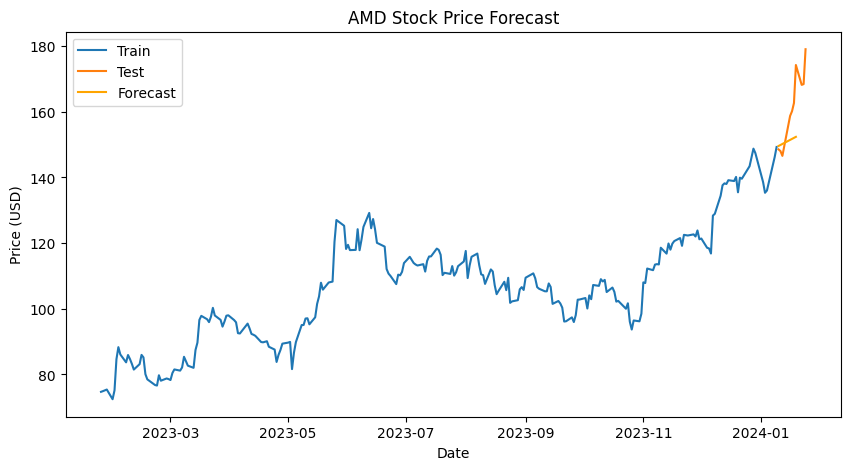

In [29]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_dates, forecast, label='Forecast', color='orange')
plt.title('AMD Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [27]:
forecast

242    149.569372
243    149.878750
244    150.188127
245    150.497505
246    150.806882
247    151.116260
248    151.425638
249    151.735015
250    152.044393
251    152.353770
dtype: float64

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1314.994, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1316.994, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1316.994, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1317.024, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1318.994, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.358 seconds
Forecasted Prices for the Next 7 Days:
                           Forecasted Price
2024-01-25 00:00:00-05:00        180.369320
2024-01-26 00:00:00-05:00        180.788642
2024-01-27 00:00:00-05:00        181.207965
2024-01-28 00:00:00-05:00        181.627288
2024-01-29 00:00:00-05:00        182.046610
2024-01-30 00:00:00-05:00        182.465933
2024-01-31 00:00:00-05:00        182.885256


c:\Users\Ivy\IvyProjects\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ivy\IvyProjects\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


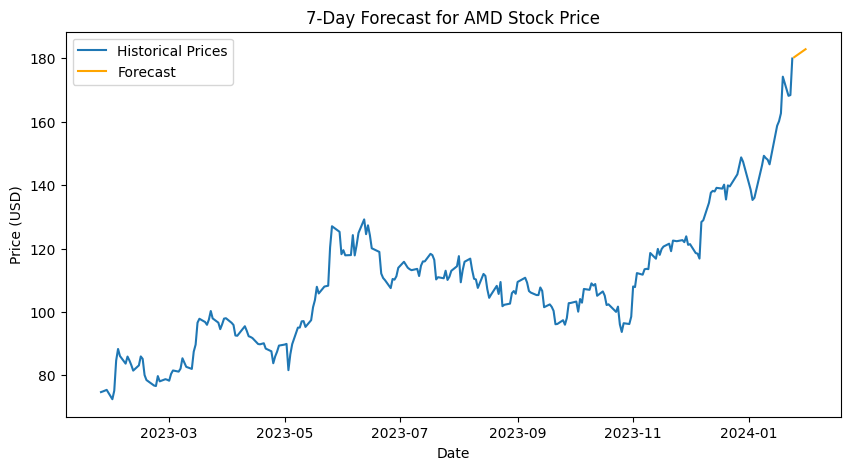

In [56]:
# Fetching the data
ticker_symbol = 'AMD'
ticker_data = yf.Ticker(ticker_symbol)
df = ticker_data.history(period='1y')

# Select only the closing prices
closing_prices = df['Close']

# Splitting the data into train and test
# Here, we're not splitting for test since we're forecasting future prices
train = closing_prices

# Building the model with auto_arima
model = auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True,
                   error_action="ignore", max_order=None, trace=True)

# Forecasting the next 7 days
forecast = model.predict(n_periods=7)

# Creating a date range for the forecast
# Adjusting the start date to the next day after the last date in the data
forecast_dates = pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=7)

# Creating a DataFrame for the forecasted values
forecast_df = pd.DataFrame(data=forecast.values, index=forecast_dates, columns=['Forecasted Price'])

# Printing the forecasted prices and dates
print("Forecasted Prices for the Next 7 Days:")
print(forecast_df)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Historical Prices')
plt.plot(forecast_df.index, forecast_df['Forecasted Price'], label='Forecast', color='orange')
plt.title('7-Day Forecast for AMD Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [58]:
forecast_df = pd.DataFrame(data=forecast.values, index=forecast_dates, columns=['Forecasted Price'])
forecast_df

,Forecasted Price
2024-01-25 00:00:00-05:00,180.369320
2024-01-26 00:00:00-05:00,180.788642
2024-01-27 00:00:00-05:00,181.207965
2024-01-28 00:00:00-05:00,181.627288
2024-01-29 00:00:00-05:00,182.046610
2024-01-30 00:00:00-05:00,182.465933
2024-01-31 00:00:00-05:00,182.885256


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1856.809, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1858.606, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1858.612, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1859.795, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1860.800, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.357 seconds
Forecasted Prices for the Next 7 Days:
                           Forecasted Price
2024-01-18 00:00:00-05:00        562.025824
2024-01-19 00:00:00-05:00        563.521619
2024-01-20 00:00:00-05:00        565.017413
2024-01-21 00:00:00-05:00        566.513208
2024-01-22 00:00:00-05:00        568.009003


c:\Users\Ivy\IvyProjects\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ivy\IvyProjects\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


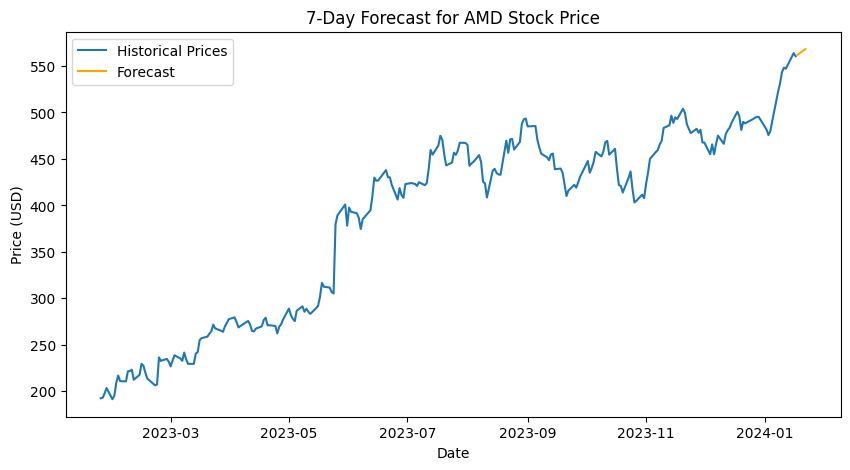

In [63]:
# Fetching the data
ticker_symbol = 'NVDA'
ticker_data = yf.Ticker(ticker_symbol)
df = ticker_data.history(period='1y')

# Select only the closing prices
closing_prices = df['Close']

# Splitting the data into train and test
# Here, we're not splitting for test since we're forecasting future prices
train = closing_prices.iloc[:-5]
test = closing_prices.iloc[-5:]

# Building the model with auto_arima
model = auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True,
                   error_action="ignore", max_order=None, trace=True)

# Forecasting the next 7 days
forecast = model.predict(n_periods=5)

# Creating a date range for the forecast
# Adjusting the start date to the next day after the last date in the data
forecast_dates = pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=5)

# Creating a DataFrame for the forecasted values
forecast_df = pd.DataFrame(data=forecast.values, index=forecast_dates, columns=['Forecasted Price'])

# Printing the forecasted prices and dates
print("Forecasted Prices for the Next 7 Days:")
print(forecast_df)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Historical Prices')
plt.plot(forecast_df.index, forecast_df['Forecasted Price'], label='Forecast', color='orange')
plt.title('7-Day Forecast for AMD Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [64]:
test

Date
2024-01-18 00:00:00-05:00    571.070007
2024-01-19 00:00:00-05:00    594.909973
2024-01-22 00:00:00-05:00    596.539978
2024-01-23 00:00:00-05:00    598.729980
2024-01-24 00:00:00-05:00    624.250916
Name: Close, dtype: float64